<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Machine_Learning_in_Bioinformatics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from collections import Counter
import itertools
import numpy as np

def kmer_features(seq, k=3):
    kmers = ["".join(p) for p in itertools.product("ATGC", repeat=k)]
    counts = Counter([seq[i:i+k] for i in range(len(seq)-k+1)])
    return np.array([counts[km] for km in kmers])

seq = "ATGCGATGACCTGACT"
print("3-mer features:", kmer_features(seq, 3)[:10])

3-mer features: [0 0 0 0 0 0 2 0 0 0]


In [107]:
def aa_composition(protein_seq):
    aas = "ACDEFGHIKLMNPQRSTVWY"
    counts = Counter(protein_seq)
    return np.array([counts[aa]/len(protein_seq) for aa in aas])

protein_seq = "MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSLNNLGQKL"
print("AA composition:", aa_composition(protein_seq))

AA composition: [0.1509434  0.         0.05660377 0.03773585 0.03773585 0.09433962
 0.         0.         0.03773585 0.11320755 0.03773585 0.05660377
 0.03773585 0.01886792 0.         0.0754717  0.05660377 0.16981132
 0.         0.01886792]


In [108]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Simulated gene expression dataset: 100 samples, 50 genes
X, y = make_classification(n_samples=100, n_features=50, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



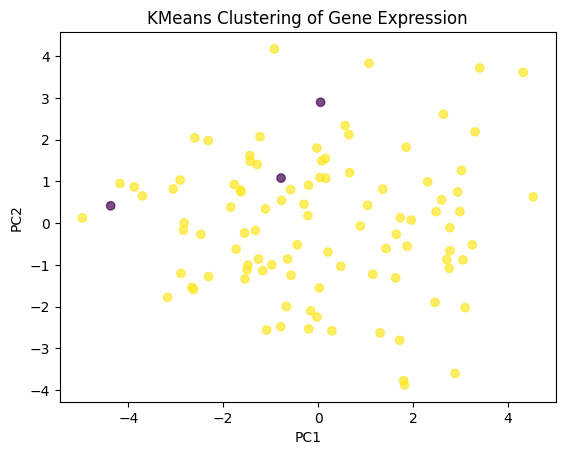

In [109]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.7)
plt.title("KMeans Clustering of Gene Expression")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [110]:
importances = clf.feature_importances_
top_genes = np.argsort(importances)[-5:]
print("Top 5 most important genes:", top_genes)

Top 5 most important genes: [25 18 39  5 22]
